0.002197690109986243 x_sp= -6.0 y_sp= 0.001075176394246186
0.007942346167396048 x_sp= -4.7 y_sp= 0.0039321735372283015
0.027624821472476295 x_sp= -3.4 y_sp= 0.014257223554843166
0.08538267690975347 x_sp= -2.0999999999999996 y_sp= 0.050169491469062355
0.20143791363587663 x_sp= -0.7999999999999998 y_sp= 0.16116697145174186
0.32702395411822355 x_sp= 0.5 y_sp= 0.42303625917838145
0.3979094096111485 x_sp= 1.8000000000000007 y_sp= 0.8481673995320723
0.42365046423678676 x_sp= 3.0999999999999996 y_sp= 1.365449632026565
0.43133386153045944 x_sp= 4.4 y_sp= 1.916195235534388
0.43348304819237826 x_sp= 5.700000000000001 y_sp= 2.4769292555239857


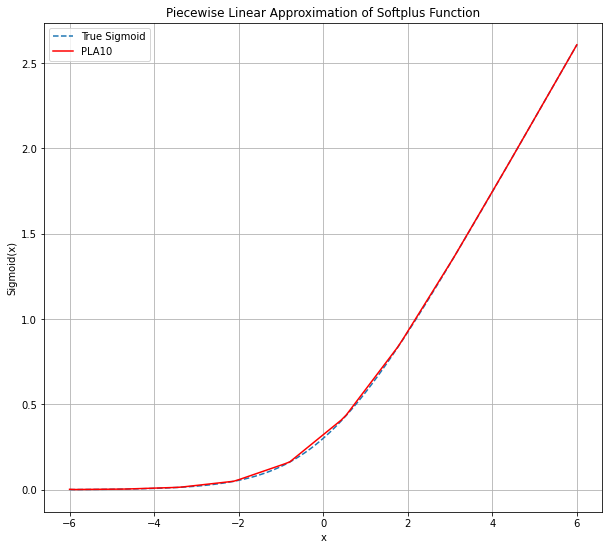

In [ ]:
# Sigmoid Function

import numpy as np

class PiecewiseSigmoid:
    def __init__(self, num_slices=10, input_range=(-6, 6)):
        """
        Initialize the piecewise linear approximation of the sigmoid function.
        :param num_slices: Number of linear segments to approximate the sigmoid function.
        :param input_range: Range of input values to consider for approximation.
        """
        self.num_slices = num_slices
        self.input_range = input_range
        self.breakpoints = np.linspace(input_range[0], input_range[1], num_slices + 1)
        self.slopes, self.intercepts = self._compute_segments()

    def _sigmoid(self, x):
        """Compute the sigmoid function."""
        return 1 / (1 + np.exp(-x))

    def _compute_segments(self):
        """Compute the slopes and intercepts for each linear segment."""
        slopes = []
        intercepts = []
        for i in range(len(self.breakpoints) - 1):
            x1, x2 = self.breakpoints[i], self.breakpoints[i + 1]
            y1, y2 = self._sigmoid(x1), self._sigmoid(x2)
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - slope * x1
            print(slope, "x=", x1, "y=", y1)
            slopes.append(slope)
            intercepts.append(intercept)
        return slopes, intercepts

    def __call__(self, x):
        """
        Evaluate the piecewise linear sigmoid approximation at a given input x.
        :param x: Input value or numpy array.
        :return: Approximation of sigmoid(x).
        """
        if isinstance(x, (int, float)):  # Handle scalar input
            return self._evaluate(x)
        elif isinstance(x, np.ndarray):  # Handle numpy array input
            return np.array([self._evaluate(val) for val in x])
        else:
            raise ValueError("Input must be a scalar or a numpy array.")

    def _evaluate(self, x):
        """Evaluate the piecewise linear sigmoid approximation for a single input."""
        if x <= self.breakpoints[0]:
            return self._sigmoid(self.breakpoints[0])
        elif x >= self.breakpoints[-1]:
            return self._sigmoid(self.breakpoints[-1])
        for i in range(len(self.breakpoints) - 1):
            if self.breakpoints[i] <= x < self.breakpoints[i + 1]:
                return self.slopes[i] * x + self.intercepts[i]
        return self._sigmoid(x)  # Fallback (though it shouldn't reach here)
    
    def compute_error(self,x_values):
        x_values = np.array(x_values)
        approximated_values = self(x_values)
        true_values = self._sigmoid(x_values)
        errors = np.abs(approximated_values - true_values)
        max_error = errors.max()
        return errors, max_error

# Example usage
# sigmoid_approx = PiecewiseSigmoid(num_slices=16, input_range=(-6, 6))
# x_values16 = np.linspace(-10, 10, 100)
# y_values16 = sigmoid_approx(x_values16)
# error16,max_error16 = sigmoid_approx.compute_error(x_values16)

sigmoid_approx = PiecewiseSigmoid(num_slices=12, input_range=(-6, 6))
x_values = np.linspace(-6, 6, 100)
y_values = sigmoid_approx(x_values)
error,max_error = sigmoid_approx.compute_error(x_values)

# sigmoid_approx8 = PiecewiseSigmoid(num_slices=8, input_range=(-6, 6))
# x_values8 = np.linspace(-10, 10, 100)
# y_values8 = sigmoid_approx8(x_values8)
# error8,max_error8 = sigmoid_approx.compute_error(x_values8)

# sigmoid_approx4 = PiecewiseSigmoid(num_slices=4, input_range=(-6, 6))
# x_values4 = np.linspace(-10, 10, 100)
# y_values4 = sigmoid_approx4(x_values4)
# error4,max_error4 = sigmoid_approx.compute_error(x_values4)



# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
plt.plot(x_values, 1 / (1 + np.exp(-x_values)), label="True Sigmoid", linestyle="--")
# plt.plot(x_values, -1 / (1 + np.exp(-x_values)) + 1, label="True Sigmoid (Mirrorred to (0,0.5))", color="red")
# print("Sigmoid");print( 1 / (1 + np.exp(-x_values)))
# print("Softplus");print(np.log10(1+np.exp(x_values)))
plt.plot(x_values, y_values, label="PLA10", color="red")
# plt.plot(x_values8, y_values8, label="PLA8", color="yellow")
# plt.plot(x_values4, y_values4, label="PLA4", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.title("Piecewise Linear Approximation of Sigmoid Function")
# plt.title("Sigmoid Function")
plt.grid(True)

plt.show()

# print(f'Max Error for 4 slice: {max_error4}')
# print(f'Max Error for 8 slice: {max_error8}')
# print(f'Max Error for 10 slice: {max_error}')
# print(f'Max Error for 16 slice: {max_error16}')


0.01321880513712285 x= -4.0 y= 0.007882413541646564
0.0340229161161486 x= -3.0 y= 0.021101218678769414
0.08092368748594694 x= -2.0 y= 0.05512413479491801
0.16498217338311624 x= -1.0 y= 0.13604782228086496
0.2693123085201356 x= 0.0 y= 0.3010299956639812
0.3533707944173048 x= 1.0 y= 0.5703423041841168
0.4002715657871033 x= 2.0 y= 0.9237130986014216
0.421075676766129 x= 3.0 y= 1.323984664388525
0.42932850715448634 x= 4.0 y= 1.745060341154654
0.4324532195046169 x= 5.0 y= 2.1743888483091403


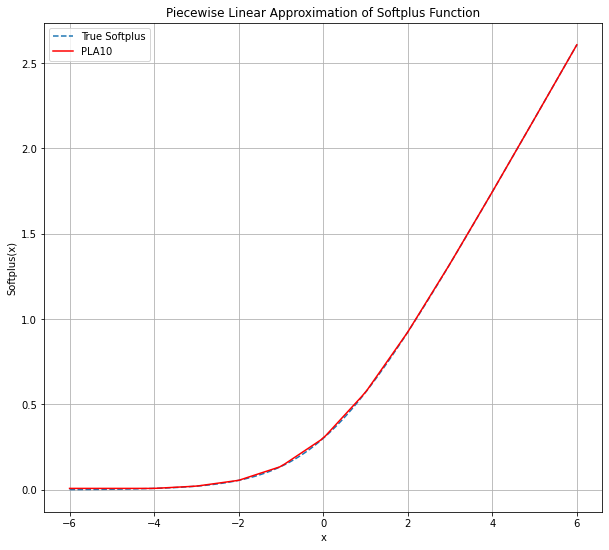

In [18]:
# Softplus Function

import numpy as np

class PiecewiseSigmoid:
    def __init__(self, num_slices=10, input_range=(-6, 6)):
        """
        Initialize the piecewise linear approximation of the sigmoid function.
        :param num_slices: Number of linear segments to approximate the sigmoid function.
        :param input_range: Range of input values to consider for approximation.
        """
        self.num_slices = num_slices
        self.input_range = input_range
        self.breakpoints = np.linspace(input_range[0], input_range[1], num_slices + 1)
        self.slopes, self.intercepts = self._compute_segments()
    
    def _softplus(self, x):
        return np.log10(1+np.exp(x))

    def _compute_segments(self):
        """Compute the slopes and intercepts for each linear segment."""
        slopes = []
        intercepts = []
        for i in range(len(self.breakpoints) - 1):
            x1, x2 = self.breakpoints[i], self.breakpoints[i + 1]
            y1, y2 = self._softplus(x1),self._softplus(x2)
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - slope * x1
            print(slope, "x=", x1, "y=", y1)
            slopes.append(slope)
            intercepts.append(intercept)
        return slopes, intercepts

    def __call__(self, x):
        """
        Evaluate the piecewise linear sigmoid approximation at a given input x.
        :param x: Input value or numpy array.
        :return: Approximation of sigmoid(x).
        """
        if isinstance(x, (int, float)):  # Handle scalar input
            return self._evaluate(x)
        elif isinstance(x, np.ndarray):  # Handle numpy array input
            return np.array([self._evaluate(val) for val in x])
        else:
            raise ValueError("Input must be a scalar or a numpy array.")

    def _evaluate(self, x):
        """Evaluate the piecewise linear sigmoid approximation for a single input."""
        if x <= self.breakpoints[0]:
            return self._softplus(self.breakpoints[0])
        elif x >= self.breakpoints[-1]:
            return self._softplus(self.breakpoints[-1])
        for i in range(len(self.breakpoints) - 1):
            if self.breakpoints[i] <= x < self.breakpoints[i + 1]:
                return self.slopes[i] * x + self.intercepts[i]
        return self._softplus(x)  # Fallback (though it shouldn't reach here)
    
    def compute_error(self,x_values):
        x_values = np.array(x_values)
        approximated_values = self(x_values)
        true_values = self._softplus(x_values)
        errors = np.abs(approximated_values - true_values)
        max_error = errors.max()
        return errors, max_error

# Example usage
# sigmoid_approx = PiecewiseSigmoid(num_slices=16, input_range=(-6, 6))
# x_values16 = np.linspace(-10, 10, 100)
# y_values16 = sigmoid_approx(x_values16)
# error16,max_error16 = sigmoid_approx.compute_error(x_values16)

sigmoid_approx = PiecewiseSigmoid(num_slices=10, input_range=(-4, 6))
x_values = np.linspace(-6, 6, 100)
y_values = sigmoid_approx(x_values)
error,max_error = sigmoid_approx.compute_error(x_values)

# sigmoid_approx8 = PiecewiseSigmoid(num_slices=8, input_range=(-6, 6))
# x_values8 = np.linspace(-10, 10, 100)
# y_values8 = sigmoid_approx8(x_values8)
# error8,max_error8 = sigmoid_approx.compute_error(x_values8)

# sigmoid_approx4 = PiecewiseSigmoid(num_slices=4, input_range=(-6, 6))
# x_values4 = np.linspace(-10, 10, 100)
# y_values4 = sigmoid_approx4(x_values4)
# error4,max_error4 = sigmoid_approx.compute_error(x_values4)



# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
plt.plot(x_values, np.log10(1+np.exp(x_values)), label="True Softplus", linestyle="--")
plt.plot(x_values, y_values, label="PLA10", color="red")
# plt.plot(x_values8, y_values8, label="PLA8", color="yellow")
# plt.plot(x_values4, y_values4, label="PLA4", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("Softplus(x)")
# plt.title("Piecewise Linear Approximation of Sigmoid Function")
plt.title("Piecewise Linear Approximation of Softplus Function")
# plt.title("Sigmoid Function")
plt.grid(True)

plt.show()

# print(f'Max Error for 4 slice: {max_error4}')
# print(f'Max Error for 8 slice: {max_error8}')
# print(f'Max Error for 10 slice: {max_error}')
# print(f'Max Error for 16 slice: {max_error16}')


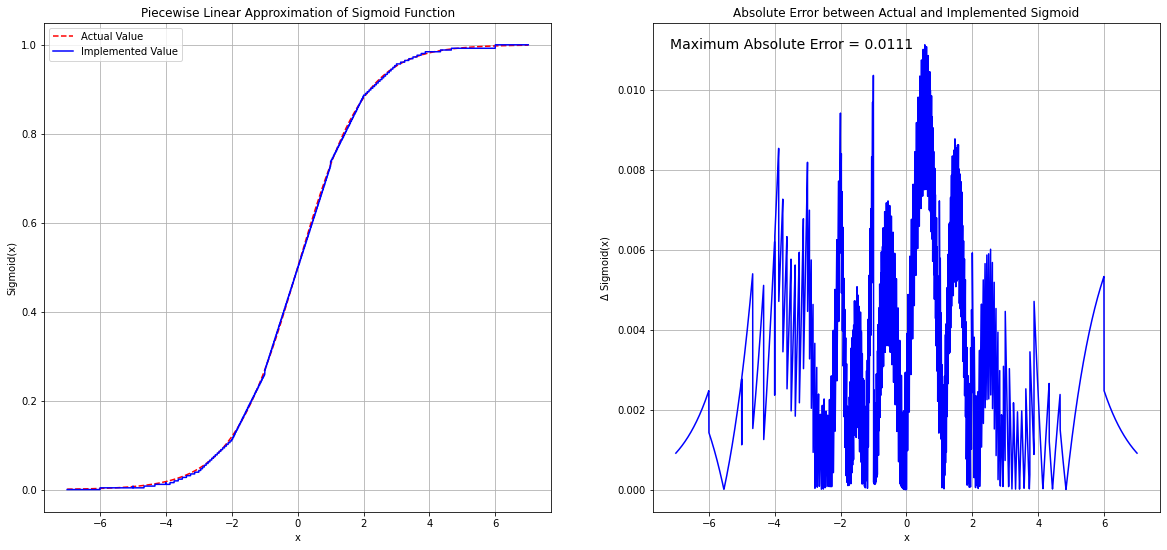

In [57]:
# Sigmoid Implementation Result

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bin_to_num(val:str):
    result = -1 * int(val[0]) * 2**7
    for idx in range(1,16):
        result += int(val[idx]) * 2**(7-idx)
    return result

filename = "sigmoid_piecewise_approx\\result_sigmoid.txt"
inVal = []; outVal = []
with open(filename,'r') as f:
    for line in f:
        content = line.rstrip().split(' ')
        inVal.append(bin_to_num(content[0])); outVal.append(bin_to_num(content[1]))

# Plot the results
import matplotlib.pyplot as plt
inVal = np.array(inVal)
outVal = np.array(outVal)
actVal = sigmoid(inVal)
abs_error = abs(actVal - outVal)
max_error = max(abs_error)

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.plot(inVal, actVal, label="Actual Value", color="red", linestyle="--")
plt.plot(inVal, outVal, label="Implemented Value", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.title("Piecewise Linear Approximation of Sigmoid Function")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(inVal, abs_error, label="Absolute Error", color="blue")
plt.xlabel("x")
plt.ylabel("$\\Delta $ Sigmoid(x)")
plt.figtext(0.56,0.84,f'Maximum Absolute Error = {max_error:.4f}',size = 14)
plt.title("Absolute Error between Actual and Implemented Sigmoid")
plt.grid(True)

plt.show()

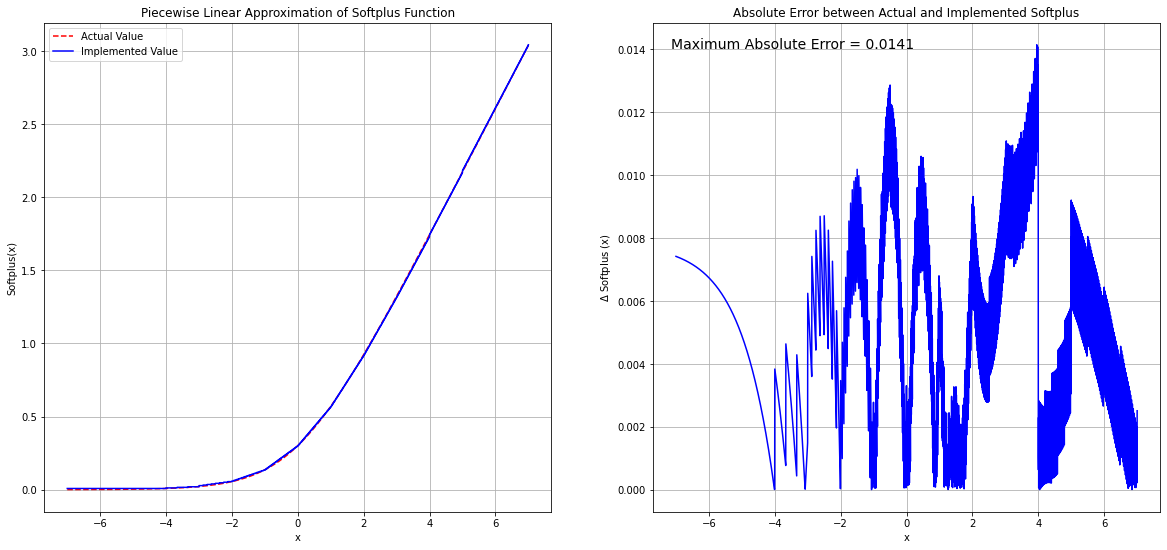

In [68]:
# Softplus Implementation Result

import numpy as np

def softplus(x):
    return np.log10(1+np.exp(x))

def bin_to_num(val:str):
    result = -1 * int(val[0]) * 2**7
    for idx in range(1,16):
        result += int(val[idx]) * 2**(7-idx)
    return result

filename = "softplus_piecewise_approx\\result_softplus.txt"
inVal = []; outVal = []
with open(filename,'r') as f:
    for line in f:
        content = line.rstrip().split(' ')
        inVal.append(bin_to_num(content[0])); outVal.append(bin_to_num(content[1]))

# Plot the results
import matplotlib.pyplot as plt
actVal = softplus(inVal)
abs_error = abs(actVal - outVal)
max_error = max(abs_error)

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.plot(inVal, actVal, label="Actual Value", color="red", linestyle="--")
plt.plot(inVal, outVal, label="Implemented Value", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("Softplus(x)")
plt.title("Piecewise Linear Approximation of Softplus Function")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(inVal, abs_error, label="Absolute Error", color="blue")
plt.xlabel("x")
plt.ylabel("$\\Delta $ Softplus (x)")
plt.figtext(0.56,0.84,f'Maximum Absolute Error = {max_error:.4f}',size = 14)
plt.title("Absolute Error between Actual and Implemented Softplus")
plt.grid(True)

plt.show()